<a href="https://colab.research.google.com/github/nathaliadutra15/disc_mineracao_dados/blob/main/P1_NATHALIA_DUTRA_OLIVEIRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ATIVIDADE P1**

## Análise Exploratória de Dados

Links deste exercício:
- https://www.kaggle.com/datasets/zynicide/wine-reviews
- https://seaborn.pydata.org/
- https://www.wine-searcher.com/critics-17-wine+enthusiast

Fomos contratados por uma grande empresa distribuidora de vinhos. Nosso cliente deseja melhorar as vendas entregando produtos que agradem os diversos perfis de clientes. O foco do nosso projeto aqui é desenvolver uma análise exploratória nos [dados de avaliações de vinhos](https://www.kaggle.com/datasets/zynicide/wine-reviews).

Uma análise exploratória bem elaborada consiste em algumas etapas:

- Compreensão do negócio
- Compreensão dos dados
- Preparar os dados (limpeza e tratamento)
- Análise de dados (extrair informações relevantes e responder perguntas)
- Avaliação dos resultados

Nosso objetivo ao concluir esse projeto é responder as seguintes perguntas:

1. De onde vem o melhor vinho ?
2. O preço do vinho está relacionado com a qualidade ?
3. Certas variedades de uvas são de maior qualidade ?
4. Qual é o melhor vinho em cada faixa de preço ?
5. Que palavras são mais utilizadas para descrever um vinho ?

Vamos começar!

# IMPORTAÇÃO DAS BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# CARREGAMENTO DO ARQUIVO CSV

In [3]:
df = pd.read_csv("/content/winemag-data-130k-v2.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# MOSTRA TODOS OS NOMES DAS COLUNAS

In [4]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

MOSTRA INFORMACOES DA TABELA, COMO DADOS NULL

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


# Gera análise descritivas das colunas numéricas, como média, desvio padrão, mínimo e máximo.

In [6]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


# Conta a quantidade de vezes que cada país aparece no DataFrame.

In [7]:
df["country"].value_counts()

,count
country,
US,54504
France,22093
Italy,19540
Spain,6645
Portugal,5691
Chile,4472
Argentina,3800
Austria,3345
Australia,2329


# Conta a frequência de cada variedade de vinho no conjunto de dados.

In [8]:
df["variety"].value_counts()

,count
variety,
Pinot Noir,13272
Chardonnay,11753
Cabernet Sauvignon,9472
Red Blend,8946
Bordeaux-style Red Blend,6915
...,...
Cabernet Sauvignon-Barbera,1
Sauvignonasse,1
Forcallà,1


# Faz uma cópia da tabela original

In [9]:
df1 = df.copy()

# Remove colunas que não são relevantes para a análise

In [10]:
df1 = df1.drop(["Unnamed: 0", "designation", "region_1", "region_2", "taster_name", "taster_twitter_handle"], axis=1)
df1.head()

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   title        129971 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ MB


In [12]:
df1.shape

(129971, 8)

In [13]:
print("{:.0%}".format(df1["price"].count() / df1.shape[0]))

93%


# Remove as linhas que não possuem valores nas colunas 'country', 'price' e 'variety', garantindo que os dados restantes estejam completos.

In [14]:
df1 = df1.dropna(subset=["country", "price", "variety"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120915 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   title        120915 non-null  object 
 6   variety      120915 non-null  object 
 7   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


In [15]:
print("{:.0%}".format(df1["price"].count() / df1.shape[0]))

100%


___


Criação de um histograma que mostra a distribuição dos pontos de vinhos da coluna 'points'. É utilizado intervalos de pontos entre 80 e o valor máximo presente no conjunto de dados, com cada intervalo representando um ponto específico.

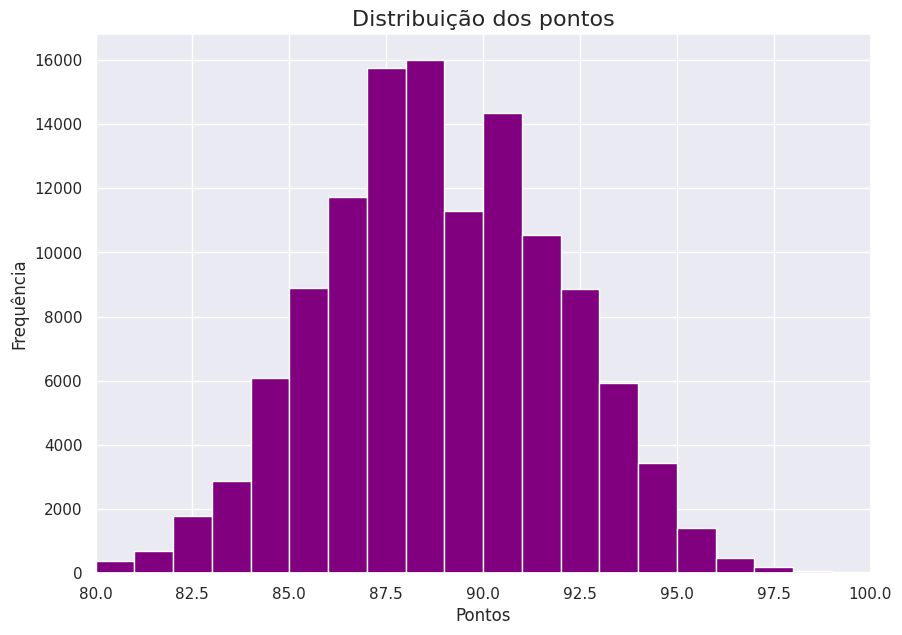

In [16]:
plt.figure(figsize=(10, 7))
plt.hist(df1['points'],
         bins=np.arange(80, df1['points'].max()+1, 1),
         color='purple')
plt.xlim(80, 100)
plt.title('Distribuição dos pontos', fontsize=16)
plt.xlabel('Pontos')
plt.ylabel('Frequência')
plt.show()

# Top 10 dos paises que mais produzem vinhos: tabela X gráfico

In [17]:
country_top_10 = df1['country'].value_counts()[:10]
country_top_10

,count
country,
US,54265
France,17776
Italy,16914
Spain,6573
Portugal,4875
Chile,4415
Argentina,3756
Austria,2799
Australia,2294


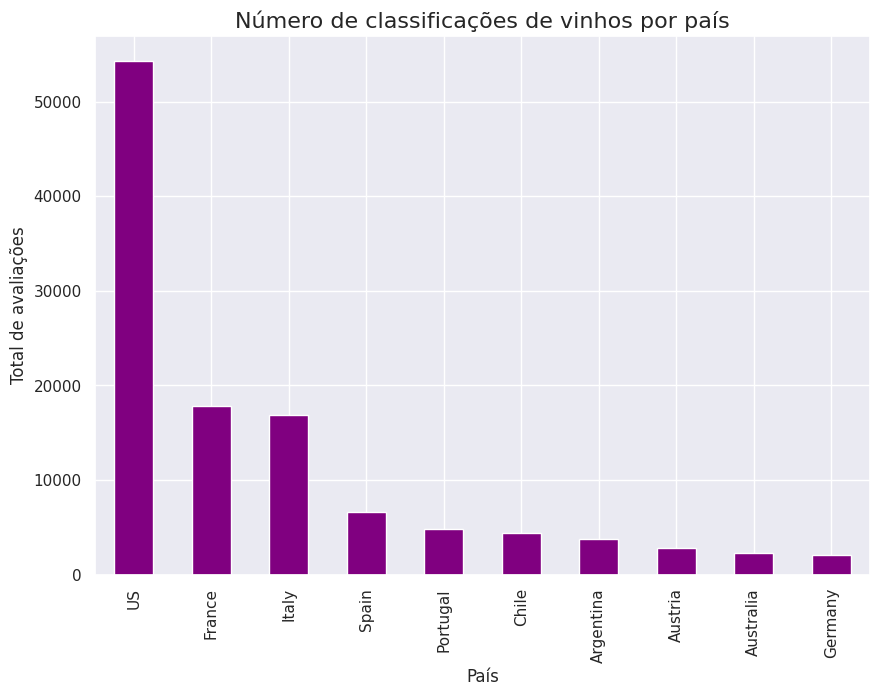

In [18]:
plt.figure(figsize=(10, 7))
country_top_10.plot(kind='bar', color='purple')
plt.title('Número de classificações de vinhos por país', fontsize=16)
plt.xlabel('País')
plt.ylabel('Total de avaliações')
plt.show()

Cálculo da média dos pontos dos vinhos para cada país; Seleciona os 10 países com as maiores médias, ordena esses países de forma decrescente, converte em uma série e aplica um gradiente de cor roxa ao DataFrame resultante para destacar visualmente os países com melhores pontuações médias. (tabela x gráfico)


In [19]:
melhor_qualidade = df1.groupby("country")["points"].agg("mean")
melhor_qualidade = melhor_qualidade.sort_values(ascending=False)[:10]
melhor_qualidade.to_frame().style.background_gradient(cmap='Purples', high=0.5)

,points
country,
England,91.550725
India,90.222222
Austria,90.190782
Germany,89.836321
Canada,89.377953
Hungary,89.165517
China,89.000000
France,88.734867
Luxembourg,88.666667


<ipython-input-20-f9443548945a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="Purples_r")


Text(0, 0.5, 'País')

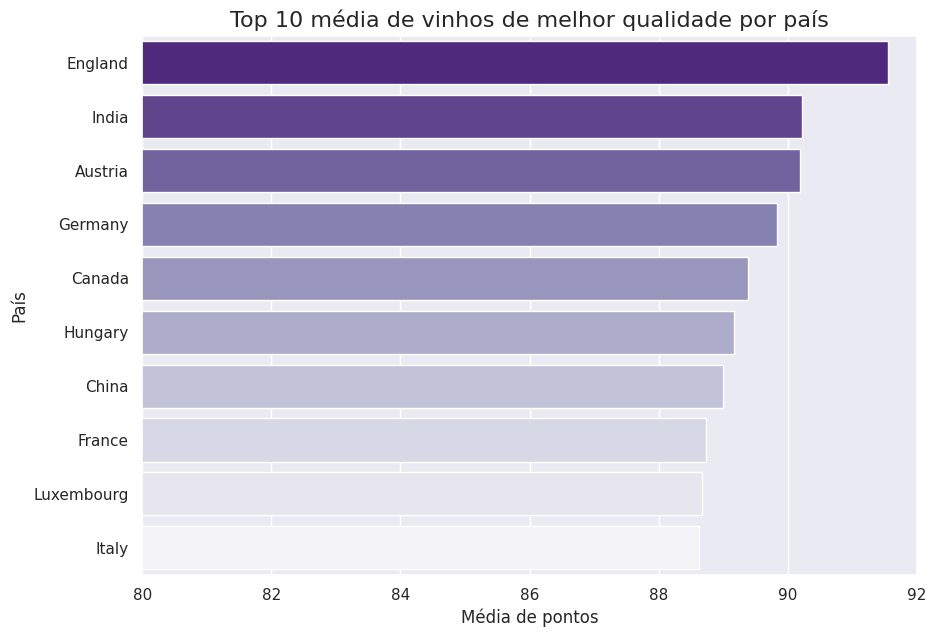

In [20]:
y = melhor_qualidade.index.to_series()
x = melhor_qualidade.values

plt.figure(figsize=(10, 7))
plt.xlim(80, 92)
sns.barplot(x=x, y=y, palette="Purples_r")
plt.title('Top 10 média de vinhos de melhor qualidade por país', fontsize=16)
plt.xlabel("Média de pontos")
plt.ylabel("País")

Filtra os vinhos com pontuações maiores ou iguais a 95 e, em seguida, mostra quantos desses vinhos de alta pontuação pertencem a cada país. A saída é uma lista dos países e a contagem de vinhos altamente pontuados para cada um deles.

In [21]:
high_scores = df1[df1['points']>=95]
high_scores["country"].value_counts()

,count
country,
US,991
France,509
Italy,326
Austria,103
Portugal,96
Germany,62
Spain,51
Australia,47
Argentina,11


Gera um boxplot mostrando a distribuição dos pontos dos vinhos para cada país presente no DataFrame df1. Cada caixa no gráfico representa a variação das pontuações dos vinhos de um país específico, permitindo comparar visualmente a qualidade dos vinhos entre diferentes países, identificando medianas e dispersão dos dados

Text(0, 0.5, 'País')

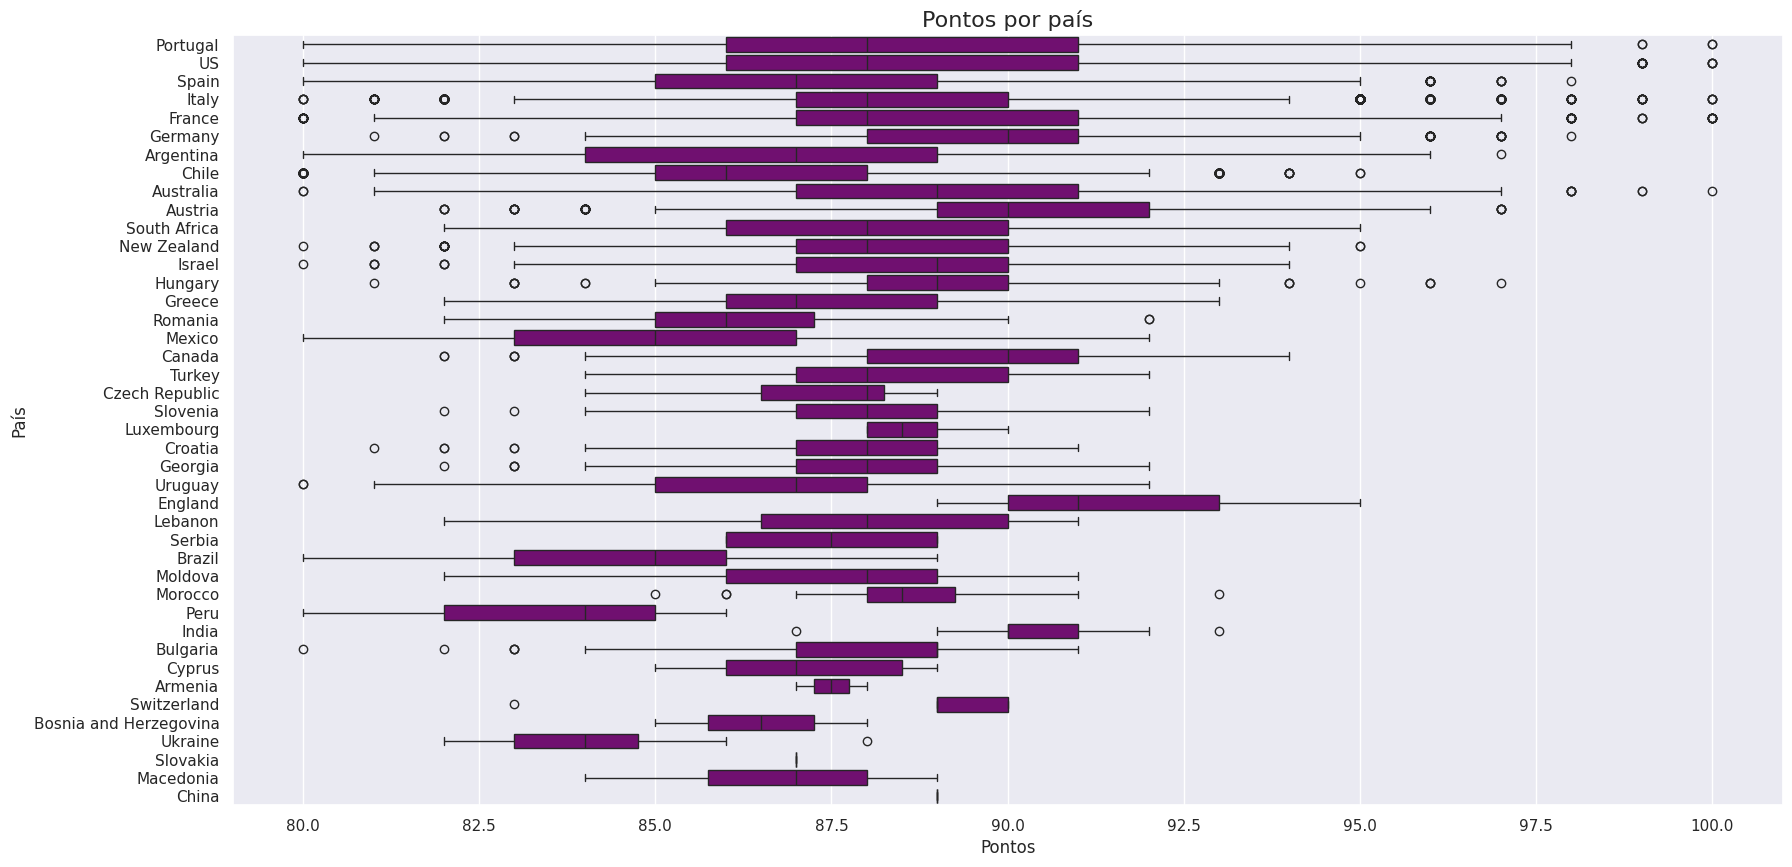

In [22]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df1, x='points', y='country', color='purple')
plt.title('Pontos por país', fontsize=16)
plt.xlabel("Pontos")
plt.ylabel("País")

Cria um gráfico de barras horizontal que mostra o preço médio das garrafas de vinho para cada país presente no DataFrame df1. Os países são listados no eixo y e os preços médios correspondentes no eixo x. Os países são ordenados de acordo com o preço médio, do mais alto para o mais baixo.

<ipython-input-23-52b72a198e3a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Purples_r')


Text(0, 0.5, 'País')

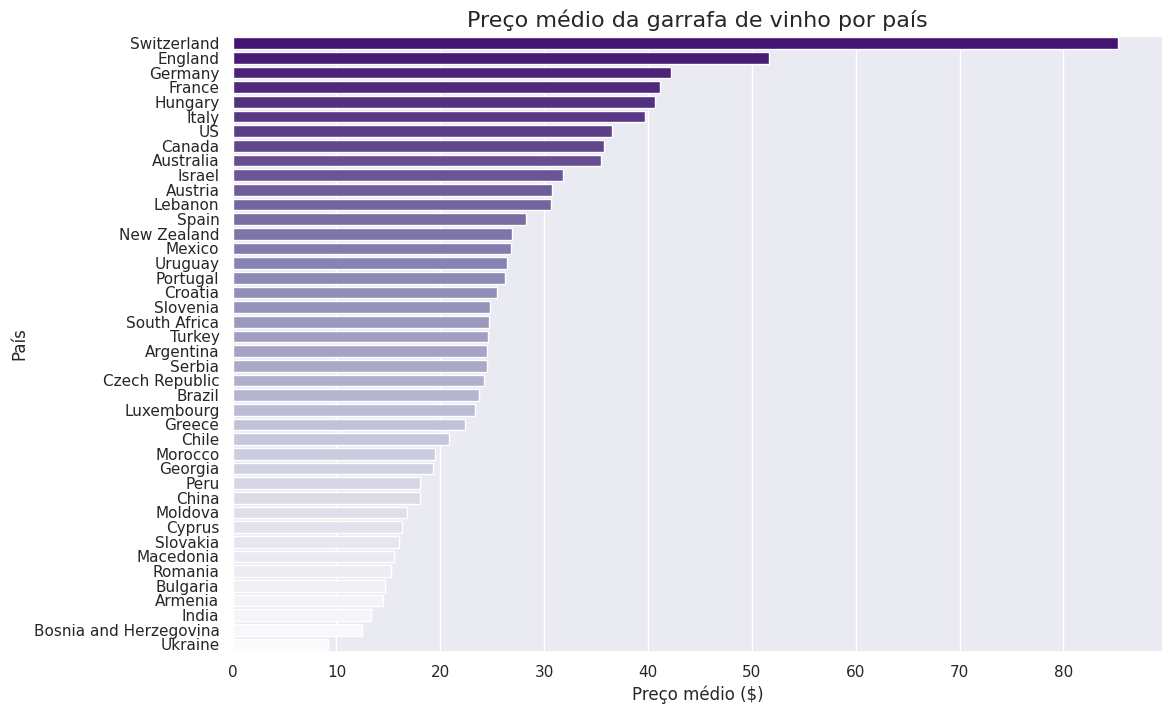

In [23]:
average_price = df1.groupby("country")["price"].mean()
average_price = average_price.sort_values(ascending=False)
y = average_price.index.to_series()
x = average_price.values

plt.figure(figsize=(12, 8))
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title('Preço médio da garrafa de vinho por país', fontsize=16)
plt.xlabel('Preço médio ($)')
plt.ylabel('País')

Cria um histograma que mostra a distribuição dos preços dos vinhos. O gráfico está limitado para mostrar apenas vinhos com preços de até 200 dólares; O objetivo é visualizar como os preços dos vinhos se distribuem, com uma ênfase na quantidade de vinhos dentro de cada faixa de preço.

Text(0, 0.5, 'Frequência')

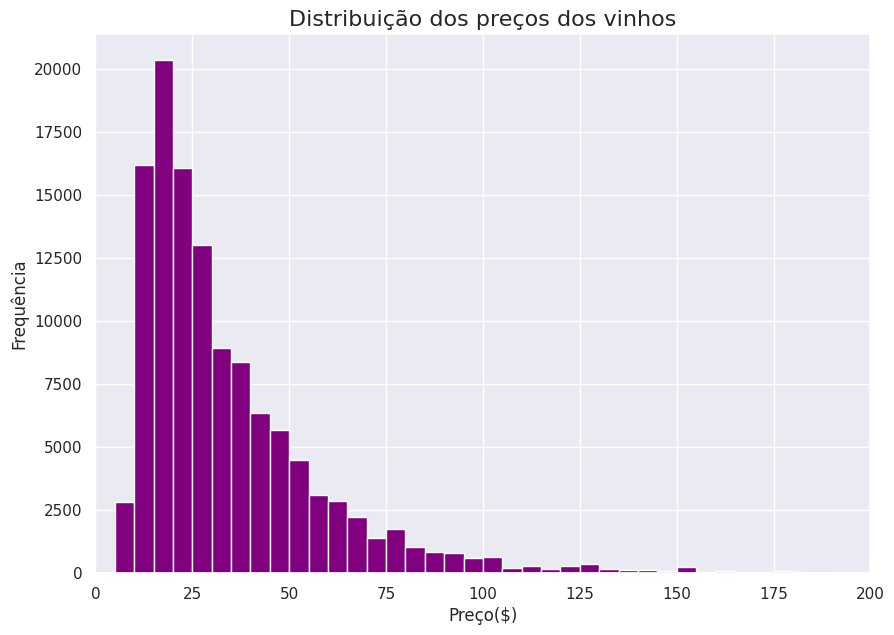

In [24]:
plt.figure(figsize=(10, 7))
bins = np.arange(0, df1["price"].max()+5, 5)
plt.hist(data=df1, x='price', bins=bins, color="purple")
plt.xlim(0, 200)
plt.title("Distribuição dos preços dos vinhos", fontsize=16)
plt.xlabel("Preço($)")
plt.ylabel("Frequência")

In [25]:
df1["price"].describe()

,price
count,120915.000000
mean,35.368796
std,41.031188
min,4.000000
25%,17.000000
50%,25.000000
75%,42.000000
max,3300.000000


In [26]:
np.log10(df1["price"]).describe()

,price
count,120915.000000
mean,1.439570
std,0.284082
min,0.602060
25%,1.230449
50%,1.397940
75%,1.623249
max,3.518514


Cria um histograma dos preços dos vinhos usando uma escala logarítmica para visualizar dados que variam exponencialmente, no caso, o preço de vinhos que pode ir de valores muito baixos a muito altos. O histograma mostra como os vinhos estão distribuídos em diferentes faixas de preço.

Text(0, 0.5, 'Frequência')

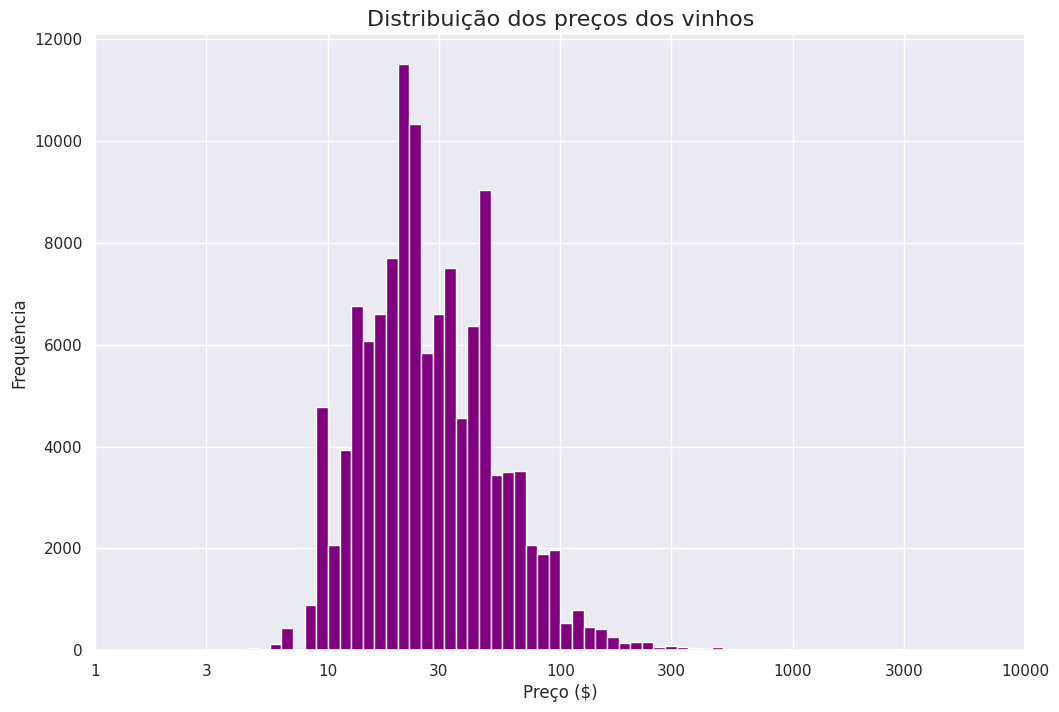

In [27]:
plt.figure(figsize=(12, 8))
bins = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data=df1, x='price', bins=bins, color="purple")
plt.title('Distribuição dos preços dos vinhos', fontsize=16)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Preço ($)')
plt.ylabel('Frequência')

Cria um gráfico de dispersão (scatter plot) com uma linha de regressão que mostra a relação entre o preço e a pontuação dos vinhos. A escala logarítmica do eixo x ajuda a visualizar a grande variação nos preços dos vinhos. A linha de regressão tenta capturar a tendência geral de como a pontuação dos vinhos muda em relação ao preço.

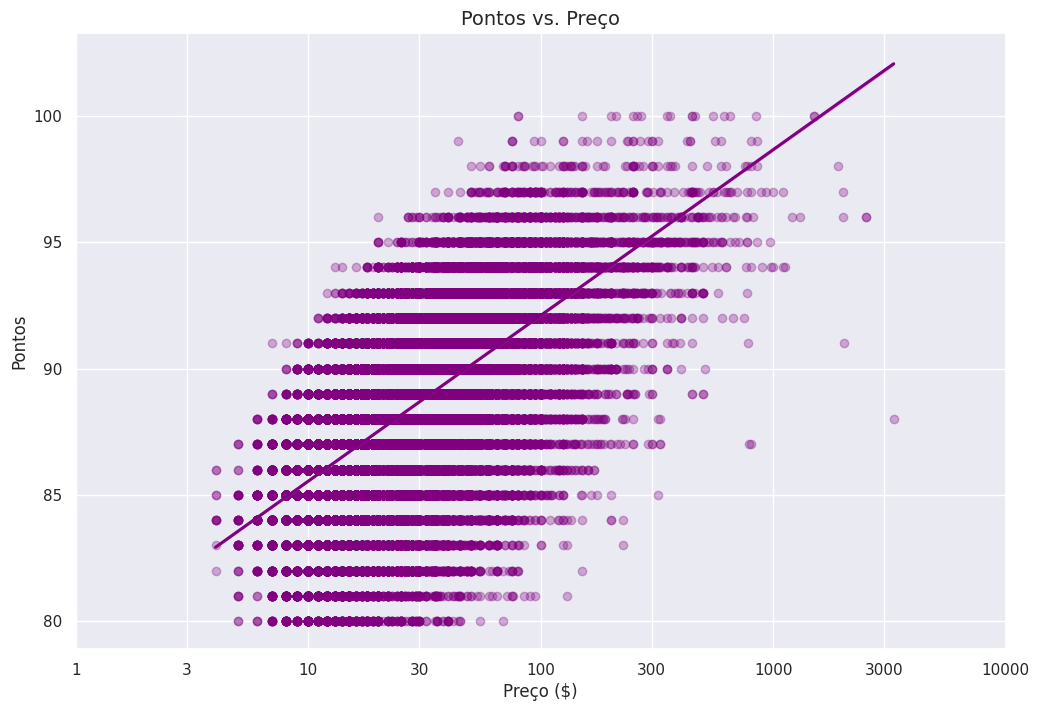

In [28]:
x = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.figure(figsize=(12, 8))
sns.regplot(x='price', y='points', data=df1, color="purple", logx=True, scatter_kws={'alpha': 0.3})
plt.title("Pontos vs. Preço", fontsize=14)
plt.xscale('log')
plt.xticks(x, x)
plt.xlabel("Preço ($)")
plt.ylabel("Pontos")
plt.show()

Filtra o conjunto de dados para encontrar o vinho com o menor preço.


In [29]:
df1[df1["price"] == df1['price'].min()][:1]

,country,description,points,price,province,title,variety,winery
1987,Spain,Berry and cherry aromas are surprisingly sturd...,85,4.0,Central Spain,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis


Filtra o conjunto de dados para encontrar o vinho com o maior preço.

In [30]:
df1[df1["price"] == df1['price'].max()][:1]

,country,description,points,price,province,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,88,3300.0,Bordeaux,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


Conta as diferentes variedades de uva no conjunto de dados e retorna as 20 variedades mais comuns.

In [31]:
df1["variety"].value_counts()[:20]

,count
variety,
Pinot Noir,12785
Chardonnay,11077
Cabernet Sauvignon,9384
Red Blend,8466
Bordeaux-style Red Blend,5340
Riesling,4971
Sauvignon Blanc,4780
Syrah,4086
Rosé,3261


Gráfico boxplot que mostra a distribuição das pontuações dos vinhos para as 20 variedades de uva mais populares no DataFrame df1. Cada caixa representa a distribuição dos pontos para uma variedade específica, mostrando a mediana (linha dentro da caixa), os quartis (limites da caixa) e os valores atípicos.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Pinot Noir'),
  Text(1, 0, 'Chardonnay'),
  Text(2, 0, 'Cabernet Sauvignon'),
  Text(3, 0, 'Red Blend'),
  Text(4, 0, 'Bordeaux-style Red Blend'),
  Text(5, 0, 'Riesling'),
  Text(6, 0, 'Sauvignon Blanc'),
  Text(7, 0, 'Syrah'),
  Text(8, 0, 'Rosé'),
  Text(9, 0, 'Merlot'),
  Text(10, 0, 'Zinfandel'),
  Text(11, 0, 'Malbec'),
  Text(12, 0, 'Sangiovese'),
  Text(13, 0, 'Nebbiolo'),
  Text(14, 0, 'Portuguese Red'),
  Text(15, 0, 'White Blend'),
  Text(16, 0, 'Sparkling Blend'),
  Text(17, 0, 'Tempranillo'),
  Text(18, 0, 'Rhône-style Red Blend'),
  Text(19, 0, 'Pinot Gris')])

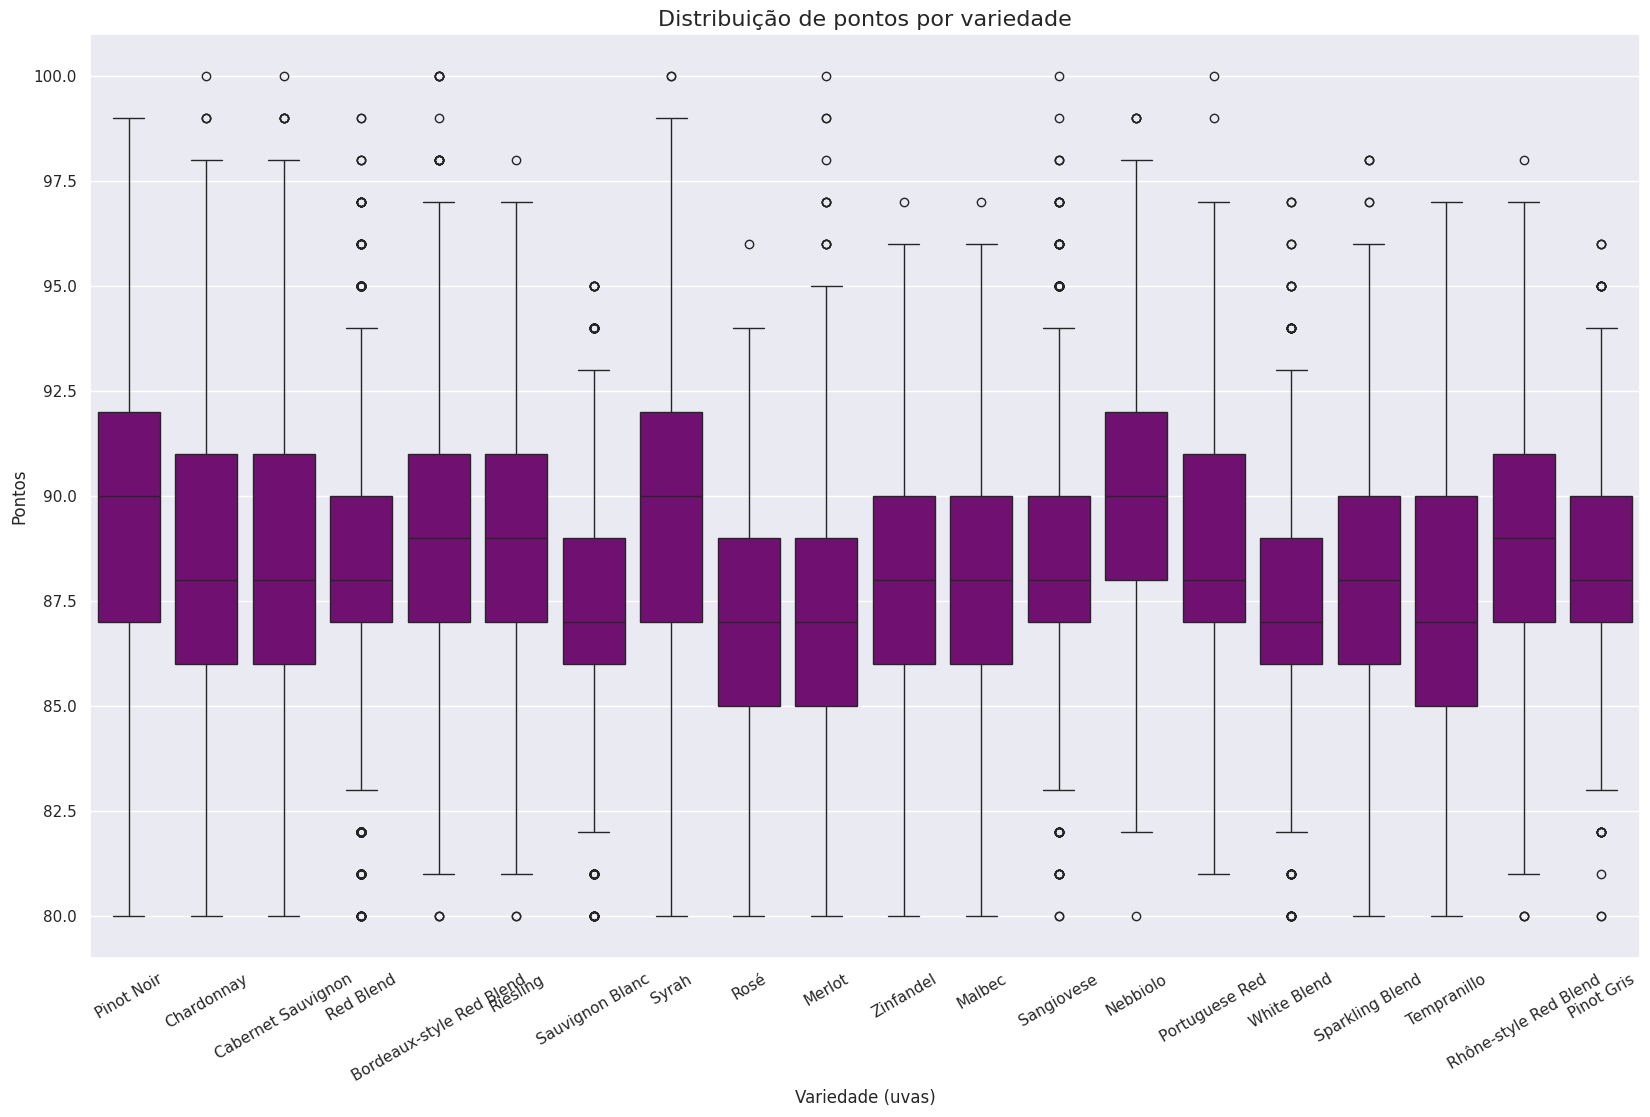

In [32]:
plt.figure(figsize=(20, 12))
sns.boxplot(data=df1,
            x='variety',
            y='points',
            color='purple',
            order=df1['variety'].value_counts().iloc[:20].index)
plt.title('Distribuição de pontos por variedade', fontsize=16)
plt.xlabel('Variedade (uvas)')
plt.ylabel('Pontos')
plt.xticks(rotation=30)

Cria um DataFrame que contém os 10 vinhos com as melhores pontuações e com preço menor ou igual a 15 dólares, ordenados por pontuação.

In [33]:
under_15 = df1.drop(["description", "province", "winery"], axis=1)
under_15 = under_15[under_15["price"] <= 15]
under_15 = under_15.sort_values(by="points", ascending=False)[:10]
under_15.style.background_gradient(cmap='YlOrRd', high=0.5, subset=["price"])

,country,points,price,title,variety
19136,Spain,94,14.000000,Osborne NV Pedro Ximenez 1827 Sweet Sherry Sherry (Jerez),Sherry
23974,Portugal,94,13.000000,Quinta dos Murças 2011 Assobio Red (Douro),Portuguese Red
12255,South Africa,93,15.000000,Simonsig 1998 Cabernet Sauvignon (Stellenbosch),Cabernet Sauvignon
129572,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé
37882,Australia,93,15.000000,Marquis Philips 2000 Sarah's Blend Red (South Eastern Australia),Red Blend
74042,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé
52776,US,93,14.000000,Uvaggio 2009 Vermentino (Lodi),Vermentino
43193,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier
9609,France,93,13.000000,Château Vincens 2011 Prestige Malbec-Merlot (Cahors),Malbec-Merlot
59823,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier


Cria um DataFrame que contém os 10 vinhos com as melhores pontuações, com o preço entre 15 e 30 dólares. O DataFrame é ordenado por pontuação.

In [34]:
between_15_and_30 = df1.drop(["description", "province", "winery"], axis=1)
between_15_and_30 = between_15_and_30.query("price > 15 and price <= 30")
between_15_and_30 = between_15_and_30.sort_values(by="points", ascending=False)[:10]
between_15_and_30.style.background_gradient(cmap='YlOrRd', high=0.5, subset=["price"])

,country,points,price,title,variety
54311,Austria,96,28.000000,Eichinger 2014 Gaisberg Reserve Riesling (Kamptal),Riesling
81902,US,96,30.000000,Efeste 2009 Lola Chardonnay (Columbia Valley (WA)),Chardonnay
45992,France,96,28.000000,Château Filhot 2014 Sauternes,Bordeaux-style White Blend
102489,US,96,27.000000,The Eyrie Vineyards 2014 Estate Chardonnay (Dundee Hills),Chardonnay
119658,Spain,96,30.000000,Alvear NV Solera 1927 Pedro Ximénez (Montilla-Moriles),Pedro Ximénez
101580,US,96,20.000000,Rulo 2007 Syrah (Columbia Valley (WA)),Syrah
9901,France,96,29.000000,Domaines Schlumberger 2014 Saering Grand Cru Riesling (Alsace),Riesling
40309,Italy,96,27.000000,Isole e Olena 2010 Chianti Classico,Red Blend
109845,US,96,30.000000,Sineann 2015 TFL Pinot Noir (Willamette Valley),Pinot Noir
54253,US,96,27.000000,Donkey & Goat 2012 Grenache Noir Grenache (El Dorado),Grenache


Cria um DataFrame que contém os 10 vinhos com as melhores pontuações, com o preço entre 30 e 50 dólares. O DataFrame é ordenado por pontuação.

In [35]:
between_30_and_50 = df1.drop(["description", "province", "winery"], axis=1)
between_30_and_50 = between_30_and_50.query("price > 30 and price <= 50")
between_30_and_50 = between_30_and_50.sort_values(by="points", ascending=False)[:10]
between_30_and_50.style.background_gradient(cmap='YlOrRd', high=0.5, subset=["price"])

,country,points,price,title,variety
118059,US,99,44.000000,Failla 2010 Estate Vineyard Chardonnay (Sonoma Coast),Chardonnay
1560,US,98,50.000000,Pirouette 2008 Red Wine Red (Columbia Valley (WA)),Bordeaux-style Red Blend
47432,US,97,50.000000,Williams Selyem 2010 Allen Vineyard Chardonnay (Russian River Valley),Chardonnay
4504,US,97,50.000000,Limerick Lane 2013 Rocky Knoll Zinfandel (Russian River Valley),Zinfandel
114981,US,97,35.000000,Donkey & Goat 2010 Fenaughty Vineyard Syrah (El Dorado),Syrah
45986,France,97,45.000000,Château Coutet 2014 Barsac,Bordeaux-style White Blend
125831,US,97,50.000000,Dutton-Goldfield 2010 Dutton Ranch Rued Vineyard Chardonnay (Green Valley),Chardonnay
16524,Portugal,97,40.000000,Taylor Fladgate NV 325 Anniversary (Port),Port
128268,US,97,50.000000,Trefethen 2005 Estate Cabernet Sauvignon (Oak Knoll District),Cabernet Sauvignon
89730,France,97,50.000000,René Muré 2015 Clos Saint Landelin Vorbourg Grand Cru Riesling (Alsace),Riesling


Cria um DataFrame que contém os 10 vinhos com as melhores pontuações cujo preço é maior que 50 dólares. O DataFrame é ordenado por pontuação.

In [36]:
under_50 = df1.drop(["description", "province", "winery"], axis=1)
under_50 = under_50.query("price > 50")
under_50 = under_50.sort_values(by="points", ascending=False)[:10]
under_50.style.background_gradient(cmap='YlOrRd', high=0.5, subset=["price"])

,country,points,price,title,variety
113929,US,100,80.000000,Charles Smith 2006 Royal City Syrah (Columbia Valley (WA)),Syrah
111755,France,100,1500.000000,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend
89728,France,100,250.000000,Louis Roederer 2008 Cristal Vintage Brut (Champagne),Champagne Blend
123545,US,100,80.000000,Cayuse 2008 Bionic Frog Syrah (Walla Walla Valley (WA)),Syrah
118058,US,100,450.000000,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend
89729,France,100,617.000000,Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne),Chardonnay
45781,Italy,100,550.000000,Biondi Santi 2010 Riserva (Brunello di Montalcino),Sangiovese
111753,France,100,1500.000000,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend
111754,Italy,100,270.000000,Casanova di Neri 2007 Cerretalto (Brunello di Montalcino),Sangiovese Grosso
42197,Portugal,100,450.000000,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red


Filtrando as palavras que mais aparecem pela descrição.

(-0.5, 2047.5, 1023.5, -0.5)

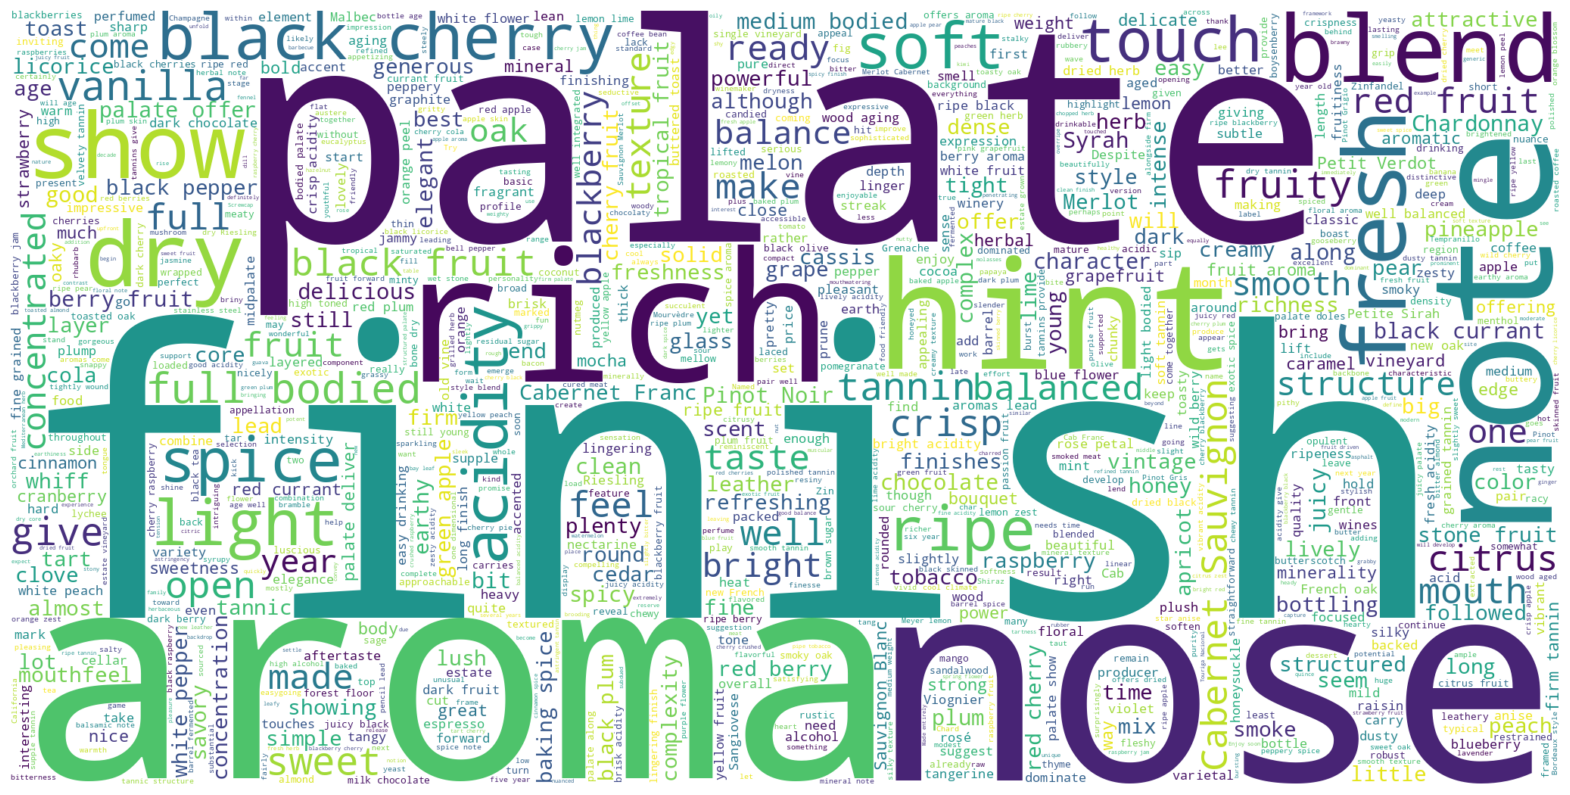

In [37]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df1["description"])

stopwords = set(STOPWORDS)
stopwords.update(("drink", "now", "wine", "flavor", "flavors"))

wordcloud = WordCloud(
    stopwords=stopwords,
    background_color="white",
    width=2048,
    height=1024,
    max_words=1000
).generate(text)

plt.figure(figsize=(20, 18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")


___


## De onde vem o melhor vinho?

A Inglaterra, em média, produz vinhos de excelente qualidade. Porém, se você busca uma garrafa com pontuação perfeita de 100, os vinhos de outros países como França, Itália, EUA, Portugal ou Austrália são os melhores.
<br>
## O preço do vinho está relacionado com a qualidade?

O preço de um vinho costuma refletir sua qualidade, mas isso não é uma regra absoluta. Foi possível encontrar um vinho de 4 dólares com a pontuação apenas 3 pontos abaixo de uma garrafa que custa $3.300.
<br>
## Certas variedades de uvas são de maior qualidade?

No geral, todas as variedades de uvas são competitivas. Porém, os dados sugerem que a "Pinot Noir" se destaca.
<br>

## Qual é o melhor vinho em cada faixa de preço?

Há um vinho excelente para cada faixa de preço, com alguns rótulos se destacando em suas respectivas categorias.

## Que palavras são mais utilizadas para descrever um vinho?

Analisando a nuvem de palavras, palavras como "finish" e "palate" aparecem em boa parte das avaliações. Em seguida, outras palavras são utilizadas: aroma,nose, rich, hint.

___
# PERGUNTAS EXTRAS




## 1) Quais países oferecem o melhor custo-benefício (relação entre pontuação e preço)?

Países com vinhos na faixa de preço entre 30-50 dólares parecem oferecer o melhor custo-benefício em relação a pontuação e preço. Esses vinhos atingem pontuações de 90 pontos (ou mais) sem um custo excessivamente alto, tornando essa faixa de preço uma excelente escolha.

<ipython-input-38-aa37fa257f6c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='points', data=df1, palette='Purples')


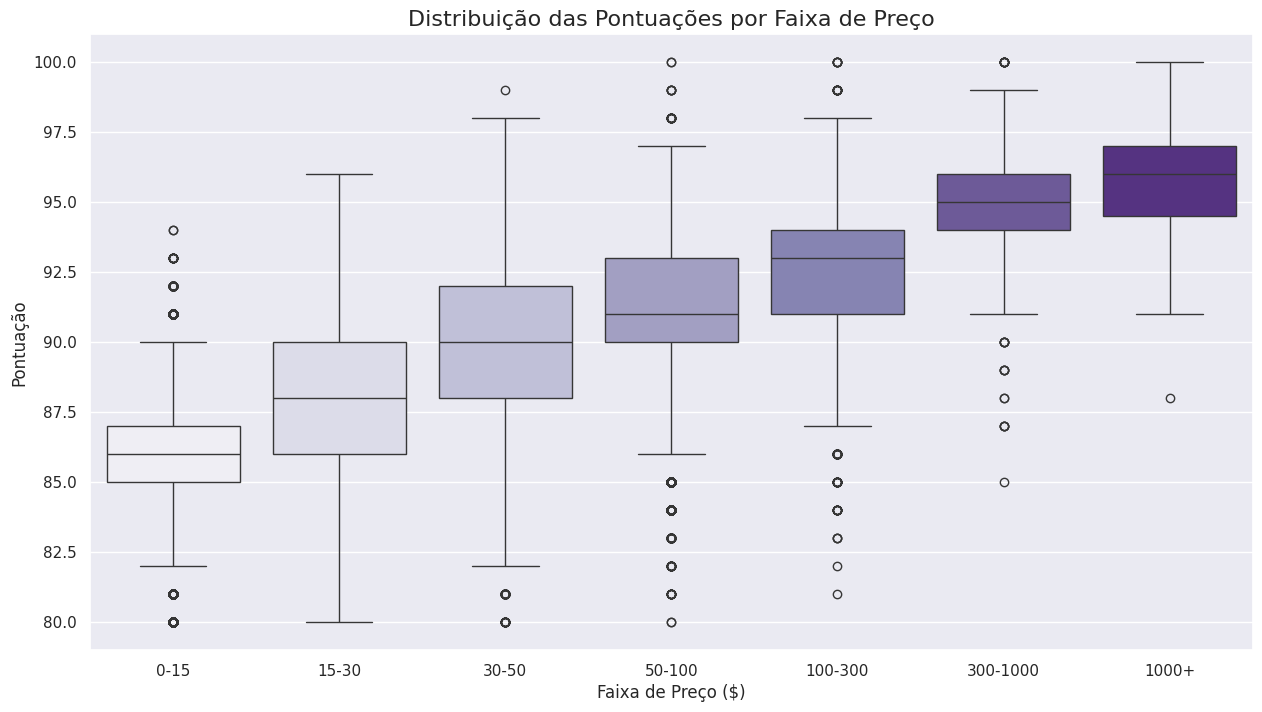

In [38]:
# Nova coluna categorizando as faixas de preço
df1['price_range'] = pd.cut(df1['price'], bins=[0, 15, 30, 50, 100, 300, 1000, df1['price'].max()],
                            labels=['0-15', '15-30', '30-50', '50-100', '100-300', '300-1000', '1000+'])

plt.figure(figsize=(15, 8))
sns.boxplot(x='price_range', y='points', data=df1, palette='Purples')
plt.title('Distribuição das Pontuações por Faixa de Preço', fontsize=16)
plt.xlabel('Faixa de Preço ($)')
plt.ylabel('Pontuação')
plt.show()

## 2) Quais são os 5 países que produzem os vinhos de maior pontuação e como se relacionam o preço e a qualidade?

Os cinco países que se destacam na produção de vinhos de alta pontuação são:

* Canadá
* Alemanha
* Austrália
* Índia
* Inglaterra

No geral, os vinhos de alta pontuação tendem a ter uma variação de preços.

Canadá e Alemanha oferecem vinhos com pontuações altas e um preço relativamente moderado, ou seja, bom custo-benefício.

Austrália apresenta vinhos com pontuações que também se destacam, porém, com uma maior dispersão de preços.

Índia e Inglaterra têm vinhos que, apesar de serem altamente pontuados, mostram uma maior concentração de preços, indicando que a qualidade pode ser mais consistente dentro de uma faixa de preço específica.


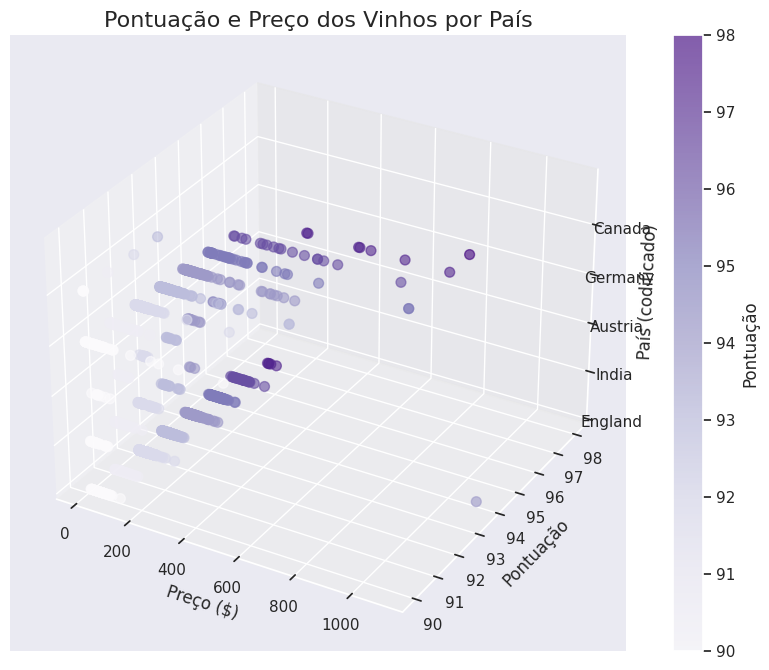

In [47]:
from mpl_toolkits.mplot3d import Axes3D

# Média das pontuações por país
average_points_per_country = df1.groupby('country')['points'].mean().sort_values(ascending=False)

top_countries = average_points_per_country.head(5).index

# Filtro dos vinhos de alta pontuação (≥ 90)
high_quality_wines = df1[df1['country'].isin(top_countries) & (df1['points'] >= 90)]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    high_quality_wines['price'],
    high_quality_wines['points'],
    high_quality_wines['country'].astype('category').cat.codes,
    c=high_quality_wines['points'],
    cmap='Purples',
    s=50,
    alpha=0.6
)

ax.set_title('Pontuação e Preço dos Vinhos por País', fontsize=16)
ax.set_xlabel('Preço ($)')
ax.set_ylabel('Pontuação')
ax.set_zlabel('País (codificado)')
ax.set_zlim([0, len(top_countries)])

ax.set_zticks(range(len(top_countries)))
ax.set_zticklabels(top_countries)

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Pontuação')

plt.show()